<a href="https://colab.research.google.com/github/minurasam/CS408/blob/main/SVM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine Implementation**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data', sep=",", names=["code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"], index_col=0)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Replace '?' with **Nan** 




In [3]:
df = df.replace('?', np.nan) # All data frame

**Drop rows containing null values**


In [4]:
df = df.dropna(axis=0)

In [5]:
def open_grades_file(filename):
    '''(str) -> (file)

    Open filename, read past its one-line header and
    return file.
    '''
    file = open(filename, 'r')
    file.readline()

    return file

f = open_grades_file("breast-cancer-wisconsin.names").read()
print(f)

   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4

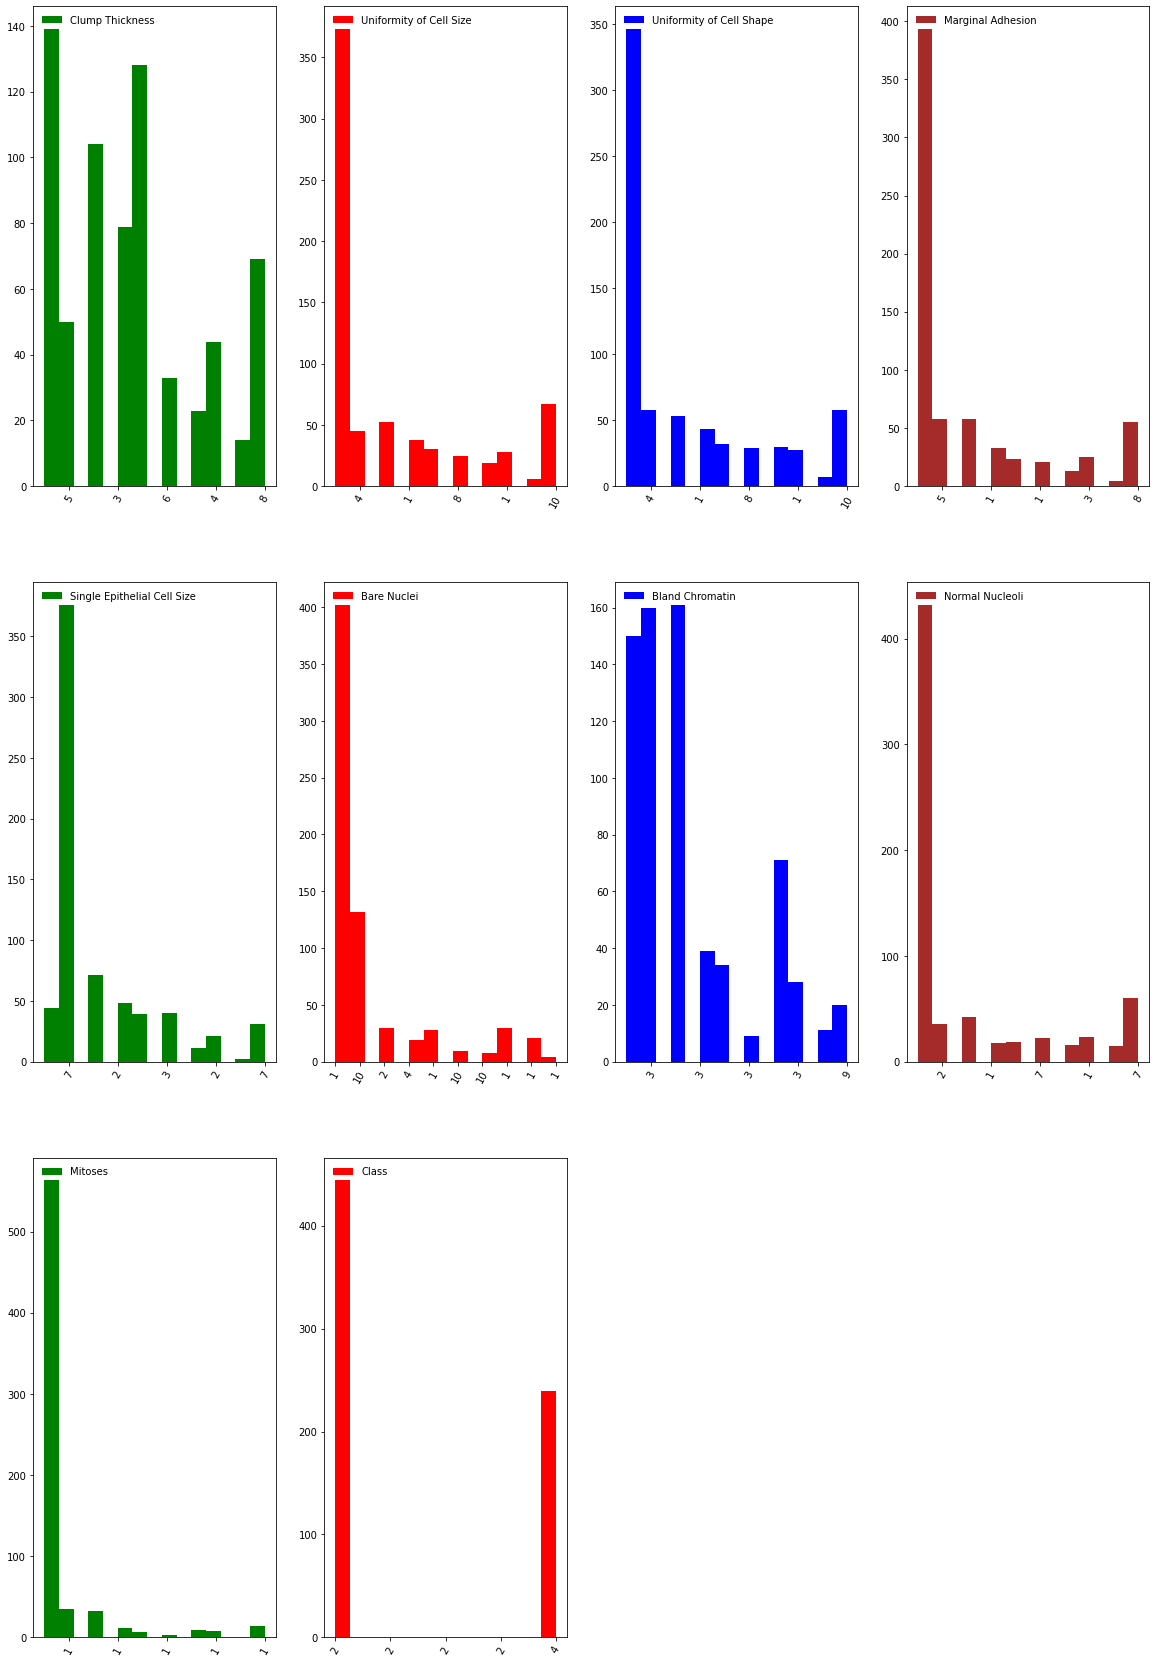

In [6]:
import matplotlib.pyplot as plt

X = df[["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]]

df = X
ncols = 4
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 30))

# Lazy counter so we can remove unwated axes
counter = 0
color = ["green", "red", "blue", "brown"]
for i in range(nrows):
    for j in range(ncols):
        
        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df.columns):

            ax.hist(df[df.columns[counter]], bins=15, color = color[j], label='{}'.format(df.columns[counter]))
            ax.set_xticklabels(df[df.columns[counter]], rotation=60)
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()



In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import cm 
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Train test split

X = df[["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

train = SVC(C=10, gamma=0.001, kernel='poly').fit(X_train, y_train)

In [8]:
print(train.score(X_train, y_train))
predict_val = train.predict(X_test)

0.9665271966527197


### **Training Score using SVM classifier was 0.9665271966527197**

In [9]:
#Area under the Curve
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'roc_auc'
results = model_selection.cross_val_score(train, X_test, y_test, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.995 (0.011)


The **Area Under the Curve** (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

In [10]:
#classification_report

from sklearn.metrics import classification_report

report = classification_report(y_test, predict_val)
print(report)

              precision    recall  f1-score   support

           2       0.91      0.98      0.95       130
           4       0.97      0.84      0.90        75

    accuracy                           0.93       205
   macro avg       0.94      0.91      0.92       205
weighted avg       0.93      0.93      0.93       205



### **Hyperparameter Tuning**

In [11]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.896, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.853, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.884, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.958, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=10, gamma=1, kernel=poly, score=0.938, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.958, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.979, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.926, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.916, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.948, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.979, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   22.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [13]:
train_linear = SVC(C=10, gamma=1, kernel='linear').fit(X_train, y_train)

print(train_linear.score(X_train, y_train))
predict_vals = train_linear.predict(X_test)


0.9769874476987448


### **Training Score using SVM classifier was 0.9769874476987448**

We can see an increase in the classifier score after hyperparameter tuning

In [14]:
#Area under the Curve
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'roc_auc'
results = model_selection.cross_val_score(train_linear, X_test, y_test, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.993 (0.010)


In [15]:
#classification_report

from sklearn.metrics import classification_report

report = classification_report(y_test, predict_vals)
print(report)

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       130
           4       0.93      0.93      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



### We can see an increase in accurracy from **93% to 95%** after hyperparameter tuning.


### Our model has a precision of **0.96** for Benign tumors, when it predicts a tumor is benign, it is correct **96%** of the time.

### Our model has a precision of **0.93** for Malignant tumors, when it predicts a tumor is malignant, it is correct **93%** of the time.

### Our model has a recall of **0.96** for Benign tumors, it correctly identifies **96%** of all benign tumors.

### Our model has a recall of **0.93** for Benign tumors, it correctly identifies **93%** of all malignant tumors.